# Name - Dhruvit Jain

# The Sparks Foundation Internship 

# GRIP January 2021 

# Task #1 -  Prediction using Supervised ML


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the csv file with scores and show the first 10 values
df = pd.read_csv('scores.csv')
print (df.shape)
df.head(10)

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Seperating the hours and scores into different lists to be easily used later
#X are the attributes
# y are the labels

X = df.iloc[:,0].values #select all columns except last as attributes
print ("Attributes: ",X)
y= df.iloc[:,-1].values #only the last column as label 
print ("Labels: ",y)

Attributes:  [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
Labels:  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


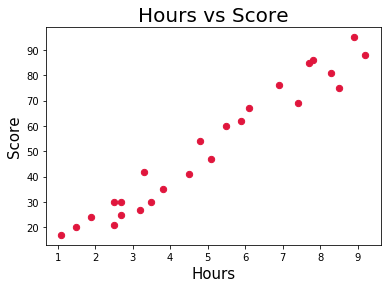

In [4]:
plt.scatter (X,y,s=40,marker='o',c='#e0163d')
plt.title("Hours vs Score",fontsize= 20)
plt.xlabel("Hours",fontsize= 15)
plt.ylabel("Score",fontsize= 15)
plt.show()

In [5]:
#Splitting available data into traning and testing blocks

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.9)
print ("Train Test split complete. \n")


X_train=X_train.reshape (-1,1)
y_train=y_train.reshape (-1,1)
X_test=X_test.reshape (-1,1)
y_test=y_test.reshape (-1,1)


# print ("Training Data \n")
# print ("Attributes to train: ",X_train)
# print ("Labels to train: ",y_train)
# print ("\nTesting Data \n")
# print ("Attributes to test:",X_test)
# print ("Labels to test:",y_test)

Train Test split complete. 



In [6]:
#Training the model and finding slope(coefficient) and intercept
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()
regression.fit(X_train,y_train)
print ("Regression Coefficient: ", regression.coef_)
print ("Regression Intercept: ", regression.intercept_)

Regression Coefficient:  [[9.49413416]]
Regression Intercept:  [4.22777638]


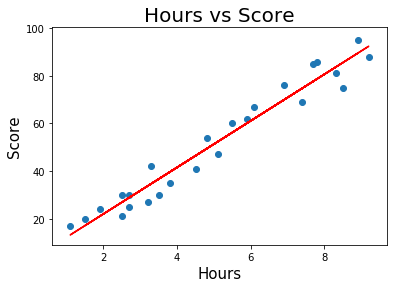

In [7]:
#Plotting the regression line on the scatter plot shown earlier

m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b,color='r') #regression line using y=mx+c formula
plt.scatter(X, y)
plt.title("Hours vs Score",fontsize= 20)
plt.xlabel("Hours",fontsize= 15)
plt.ylabel("Score",fontsize= 15)
plt.show()

In [8]:
#Now testing the test set we have created earlier
y_pred = regression.predict(X_test)
print (y_pred)

[[34.60900569]
 [27.96311178]
 [69.73730207]]


In [9]:
#Visualizing actual y and y pred
'''
flatten() is used to convert any array to a 1-D form. DataFrame uses 1-D array to form a table

'''
df = pd.DataFrame({'Actual Values of Y': y_test.flatten(), 'Predicted Values of Y': y_pred.flatten()})
print (df)

   Actual Values of Y  Predicted Values of Y
0                  27              34.609006
1                  21              27.963112
2                  76              69.737302


In [10]:
#now for our own prediction
hours_test = 9.25
hours_test = np.array(hours_test).reshape(1, -1)
score_op = regression.predict (hours_test)
print (f"If a student studies for 9.25 hrs/ day, he will score {int(score_op)} marks.")

If a student studies for 9.25 hrs/ day, he will score 92 marks.


In [11]:
#Metrics to determine how efficiently the model predicted marks when compared to actual values

from sklearn import metrics
print (f"Maximum Error: {metrics.max_error(y_test, y_pred)}")
print (f"Mean Absolute Error : {metrics.mean_absolute_error(y_test, y_pred)}")
print (f"Mean Squared Error : {metrics.mean_squared_error(y_test, y_pred)}")
print (f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Maximum Error: 7.6090056883858495
Mean Absolute Error : 6.944938465362271
Mean Squared Error : 48.53442618594593
Root Mean Squared Error : 6.96666535624799
